In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/nyt_ingredient_phrase_tagger_training_data.csv", dtype=str)
df.head()

,text,text_index,text_length,capital_letter,parenthesis_flag,label,ID
0,1$1/4,I1,L20,NoCAP,NoPAREN,B-QTY,000000001
1,cups,I2,L20,NoCAP,NoPAREN,B-UNIT,000000001
2,cooked,I3,L20,NoCAP,NoPAREN,B-COMMENT,000000001
3,and,I4,L20,NoCAP,NoPAREN,I-COMMENT,000000001
4,pureed,I5,L20,NoCAP,NoPAREN,I-COMMENT,000000001


### Goal
This notebook will aim to find the following:
* Length of text for ingredients
* Uncover generally what is in parenthesis
* Label coverage
* Ingredient text lengths
* Common ingredient names
* Identifiy misspellings of ingredient names
* Unit coverage
* Quantity Coverage

In [3]:
# Unique Ingredients
len(df['ID'].unique())

173415

In [4]:
# Ingredient text length
id_group = df.groupby('ID').count()
id_group['text'].hist()

In [5]:
id_group[['text']].describe()

,text
count,173415.000000
mean,6.118669
std,3.682272
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,56.000000


In [6]:
# Parenthesis Analysis
df[df['parenthesis_flag'] == "YesPAREN"].groupby('ID').first().groupby("label").count()

,text,text_index,text_length,capital_letter,parenthesis_flag
label,,,,,
B-COMMENT,3295,3295,3295,3295,3295
B-NAME,920,920,920,920,920
B-QTY,1688,1688,1688,1688,1688
B-RANGE_END,5,5,5,5,5
B-UNIT,79,79,79,79,79
I-COMMENT,1881,1881,1881,1881,1881
I-NAME,1170,1170,1170,1170,1170
OTHER,5389,5389,5389,5389,5389


<BarContainer object of 7 artists>

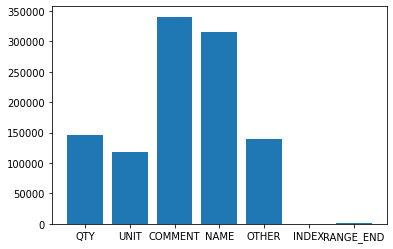

In [7]:
# Label Coverage
from collections import Counter
import matplotlib.pyplot as plt
labels = dict(Counter([i if '-' not in i else i[2:] for i in df['label']]))
plt.bar(labels.keys(), labels.values())

In [8]:
# Fix labels
df['new_label'] = [i if '-' not in i else i[2:] for i in df['label']]
df['new_label'] = [i if i != "INDEX" else "QTY" for i in df['new_label']]
df['new_label'] = [i if i != "RANGE_END" else "QTY" for i in df['new_label']]

# groupby labels to get unique labels
unique_labels = df.groupby(["ID", "new_label"]).first().reset_index()[["ID", "new_label"]]
# get unique lists of labels within and ingredients
present_labels = unique_labels.groupby("ID")['new_label'].apply(list).reset_index(name = 'present_labels')
present_labels['present_labels'] = present_labels['present_labels'].apply(sorted)
label_combination_frequency = dict(sorted(Counter(map(str,list(present_labels['present_labels']))).items(), key = lambda x:x[1], reverse = True))
num_ingredients = len(df['ID'].unique())
percentages = [round(i/num_ingredients,3) for i in label_combination_frequency.values()]
dict(list(zip(label_combination_frequency.keys(), percentages)))

{"['NAME', 'QTY', 'UNIT']": 0.263,
 "['COMMENT', 'NAME', 'QTY', 'UNIT']": 0.224,
 "['COMMENT', 'NAME', 'OTHER', 'QTY', 'UNIT']": 0.103,
 "['COMMENT', 'NAME', 'OTHER', 'QTY']": 0.065,
 "['COMMENT', 'NAME']": 0.064,
 "['COMMENT', 'NAME', 'QTY']": 0.061,
 "['NAME', 'OTHER', 'QTY', 'UNIT']": 0.043,
 "['NAME', 'OTHER', 'QTY']": 0.037,
 "['NAME', 'QTY']": 0.031,
 "['NAME']": 0.026,
 "['NAME', 'OTHER']": 0.021,
 "['NAME', 'OTHER', 'UNIT']": 0.018,
 "['COMMENT', 'NAME', 'OTHER']": 0.016,
 "['COMMENT', 'NAME', 'OTHER', 'UNIT']": 0.014,
 "['OTHER']": 0.005,
 "['OTHER', 'QTY', 'UNIT']": 0.003,
 "['OTHER', 'QTY']": 0.001,
 "['COMMENT', 'OTHER', 'QTY', 'UNIT']": 0.001,
 "['COMMENT', 'NAME', 'UNIT']": 0.001,
 "['COMMENT', 'OTHER']": 0.001,
 "['NAME', 'UNIT']": 0.001,
 "['COMMENT', 'OTHER', 'QTY']": 0.0,
 "['OTHER', 'UNIT']": 0.0,
 "['COMMENT', 'OTHER', 'UNIT']": 0.0,
 "['COMMENT', 'QTY', 'UNIT']": 0.0,
 "['COMMENT']": 0.0,
 "['QTY', 'UNIT']": 0.0,
 "['COMMENT', 'QTY']": 0.0}

In [9]:
# Common Ingredient Names
df[df['new_label']=="NAME"]

,text,text_index,text_length,capital_letter,parenthesis_flag,label,ID,new_label
6,butternut,I7,L20,NoCAP,NoPAREN,B-NAME,000000001,NAME
7,squash,I8,L20,NoCAP,NoPAREN,I-NAME,000000001,NAME
14,squash,I15,L20,NoCAP,NoPAREN,B-NAME,000000001,NAME
23,chestnuts,I7,L20,NoCAP,NoPAREN,B-NAME,000000002,NAME
35,chestnuts,I19,L20,NoCAP,NoPAREN,B-NAME,000000002,NAME
...,...,...,...,...,...,...,...,...
1061062,Angostura,I1,L4,YesCAP,NoPAREN,B-NAME,000173413,NAME
1061063,bitters,I2,L4,NoCAP,NoPAREN,I-NAME,000173413,NAME
1061066,pineapple,I3,L4,NoCAP,NoPAREN,B-NAME,000173414,NAME
1061067,Brandied,I1,L4,YesCAP,NoPAREN,B-NAME,000173415,NAME


In [10]:
ID = None
names = []
IDs = []
for i, row in df.iterrows():
    print(i, end = '\r')
    if row['ID'] != ID:
        if ID:
            names.append(name)
            IDs.append((ID))
        name = ''
        ID = row['ID']
        text_i = 0
    l = row['new_label']
    if l == "NAME":
        if (i == text_i+1) or (text_i == 0) or (name == ''): 
            name += ' '+row['text']
        text_i = i
    

In [17]:
name_id_df = pd.DataFrame(list(zip(IDs,names)),columns = ['ID','name'])

In [11]:
names_counter = sorted(Counter([i.lower() for i in names]).items(), key=lambda x:x[1], reverse = True)
names_df = pd.DataFrame(names_counter, columns = ['name', 'count'])
names_df

,name,count
0,salt,7855
1,garlic,5505
2,olive oil,4741
3,sugar,3951
4,butter,2961
...,...,...
15151,nonhydrogenated margarine,1
15152,nonhydrogenated shortening,1
15153,chile oil,1
15154,mixed chicory leaves,1


In [13]:
len(names_df[names_df['count']==1])

10423

In [24]:
# unit coverage
unit_df = df[df['new_label']=="UNIT"]
unit_count_dict = sorted(
        Counter(list(unit_df['text'])).items(),
        key = lambda x:x[1],
        reverse = True)
unit_count_df = pd.DataFrame(
    unit_count_dict,
    columns = ['unit', 'count'])
unit_count_df

,unit,count
0,cup,27686
1,tablespoons,19202
2,teaspoon,17357
3,tablespoon,10040
4,cups,9959
...,...,...
190,1/2,1
191,48-ounce,1
192,crushed,1
193,length,1


In [26]:
# qty coverage
qty_df = df[df['new_label']=="QTY"]
qty_count_dict = sorted(
        Counter(list(qty_df['text'])).items(),
        key = lambda x:x[1],
        reverse = True
)
qty_count_df = pd.DataFrame(
    qty_count_dict,
    columns = ['qty', 'count'])
qty_count_df

,qty,count
0,1,45317
1,2,29898
2,1/2,17173
3,1/4,10270
4,3,9806
...,...,...
208,57,1
209,1$1/2\t,1
210,2$1/2-inch,1
211,222,1


In [27]:
qty_count_dict

[('1', 45317),
 ('2', 29898),
 ('1/2', 17173),
 ('1/4', 10270),
 ('3', 9806),
 ('4', 9093),
 ('1$1/2', 5578),
 ('6', 4205),
 ('3/4', 3418),
 ('8', 2857),
 ('5', 1893),
 ('12', 1348),
 ('2$1/2', 977),
 ('10', 946),
 ('1$1/4', 882),
 ('7', 429),
 ('16', 370),
 ('3$1/2', 342),
 ('1$3/4', 290),
 ('2$1/4', 215),
 ('24', 213),
 ('20', 212),
 ('9', 196),
 ('4$1/2', 131),
 ('15', 124),
 ('18', 110),
 ('14', 93),
 ('2$3/4', 54),
 ('30', 50),
 ('50', 45),
 ('40', 38),
 ('32', 37),
 ('5$1/2', 37),
 ('25', 36),
 ('11', 35),
 ('36', 31),
 ('100', 31),
 ('125', 31),
 ('3$1/2-pound', 30),
 ('48', 30),
 ('75', 28),
 ('3$1/4', 27),
 ('60', 27),
 ('150', 26),
 ('250', 21),
 ('6$1/2', 19),
 ('28', 19),
 ('130', 19),
 ('4$1/4', 18),
 ('13', 17),
 ('3$3/4', 17),
 ('35', 17),
 ('1$1/2-inch', 17),
 ('55', 16),
 ('200', 13),
 ('70', 13),
 ('80', 12),
 ('65', 11),
 ('140', 11),
 ('2$1/2-pound', 10),
 ('7$1/2', 10),
 ('8$1/2', 10),
 ('120', 10),
 ('170', 10),
 ('45', 8),
 ('14$1/2-ounce', 8),
 ('300', 8),
 ('75

In [17]:
df[df['parenthesis_flag'] == "YesPAREN"].groupby('ID').first().groupby("label").count()

,text,text_index,text_length,capital_letter,parenthesis_flag
label,,,,,
B-COMMENT,3295,3295,3295,3295,3295
B-NAME,920,920,920,920,920
B-QTY,1688,1688,1688,1688,1688
B-RANGE_END,5,5,5,5,5
B-UNIT,79,79,79,79,79
I-COMMENT,1881,1881,1881,1881,1881
I-NAME,1170,1170,1170,1170,1170
OTHER,5389,5389,5389,5389,5389


In [29]:
parenth = df[df['parenthesis_flag'] == "YesPAREN"].groupby(['ID','label']).count().reset_index()
parenth[(parenth['label']!='B-COMMENT') & (parenth['label']!='I-COMMENT')]

,ID,label,text,text_index,text_length,capital_letter,parenthesis_flag
5,000000081,OTHER,4,4,4,4,4
8,000000083,B-QTY,2,2,2,2,2
10,000000083,OTHER,7,7,7,7,7
11,000000084,B-QTY,2,2,2,2,2
13,000000084,OTHER,7,7,7,7,7
...,...,...,...,...,...,...,...
30312,000173276,OTHER,4,4,4,4,4
30313,000173290,B-QTY,1,1,1,1,1
30318,000173294,B-NAME,1,1,1,1,1
30319,000173294,B-QTY,2,2,2,2,2


In [12]:
df.tail()

,text,text_index,text_length,capital_letter,parenthesis_flag,label,ID
1061064,Wedge,I1,L4,YesCAP,NoPAREN,OTHER,000173414
1061065,of,I2,L4,NoCAP,NoPAREN,OTHER,000173414
1061066,pineapple,I3,L4,NoCAP,NoPAREN,B-NAME,000173414
1061067,Brandied,I1,L4,YesCAP,NoPAREN,B-NAME,000173415
1061068,cherry,I2,L4,NoCAP,NoPAREN,I-NAME,000173415


In [4]:
df.head()

,text,text_index,text_length,capital_letter,parenthesis_flag,label
0,1$1/4,I1,L20,NoCAP,NoPAREN,B-QTY
1,cups,I2,L20,NoCAP,NoPAREN,B-UNIT
2,cooked,I3,L20,NoCAP,NoPAREN,B-COMMENT
3,and,I4,L20,NoCAP,NoPAREN,I-COMMENT
4,pureed,I5,L20,NoCAP,NoPAREN,I-COMMENT


In [5]:
df.describe()

,text,text_index,text_length,capital_letter,parenthesis_flag,label
count,1061069,1061069,1061069,1061069,1061069,1061069
unique,11251,56,6,2,2,10
top,",",I1,L8,NoCAP,NoPAREN,I-COMMENT
freq,63009,173415,497355,1025191,973502,224274


### Label Exploration

In [6]:
df.groupby("label").count()

,text,text_index,text_length,capital_letter,parenthesis_flag
label,,,,,
B-COMMENT,116308,116308,116308,116308,116308
B-INDEX,2,2,2,2,2
B-NAME,179955,179955,179955,179955,179955
B-QTY,145785,145785,145785,145785,145785
B-RANGE_END,1855,1855,1855,1855,1855
B-UNIT,117554,117554,117554,117554,117554
I-COMMENT,224274,224274,224274,224274,224274
I-NAME,135763,135763,135763,135763,135763
I-UNIT,103,103,103,103,103


In [7]:
from collections import Counter

In [8]:
Counter([i if '-' not in i else i[2:] for i in df['label']])

Counter({'QTY': 145785,
         'UNIT': 117657,
         'COMMENT': 340582,
         'NAME': 315718,
         'OTHER': 139470,
         'INDEX': 2,
         'RANGE_END': 1855})

<u>Label Definition:</u>
* QTY - quantity of the ingredient
* UNIT - unit of measurement
* COMMENT - comment on the method or alternative ingredient to use
* OTHER - punctuation, non-ingredients
* INDEX - combine with quantity
* RANGE_END - the end of a qunatity range e.g. 1 to 2 (cups)

In [21]:
df[df['text'].str.startswith("(")].groupby("label").count()

,text,text_index,text_length,capital_letter,parenthesis_flag
label,,,,,
B-COMMENT,4187,4187,4187,4187,4187
B-NAME,112,112,112,112,112
I-COMMENT,2827,2827,2827,2827,2827
I-NAME,787,787,787,787,787
OTHER,6987,6987,6987,6987,6987


In [24]:
df[df['text'].str.startswith("(")].groupby("parenthesis_flag").count()

,text,text_index,text_length,capital_letter,label
parenthesis_flag,,,,,
YesPAREN,14900,14900,14900,14900,14900


In [9]:
df.groupby("parenthesis_flag").count()

,text,text_index,text_length,capital_letter,label
parenthesis_flag,,,,,
NoPAREN,973502,973502,973502,973502,973502
YesPAREN,87567,87567,87567,87567,87567


In [14]:
df[df['label'].str.contains("UNIT")].groupby("text").count()

,text_index,text_length,capital_letter,parenthesis_flag,label
text,,,,,
-ounce,1,1,1,1,1
1,2,2,2,2,2
1$1/2-pound,1,1,1,1,1
1-pound,1,1,1,1,1
1/2,1,1,1,1,1
...,...,...,...,...,...
tube,1,1,1,1,1
twist,8,8,8,8,8
very,3,3,3,3,3


In [13]:
df[df['label'].str.contains("QTY")].groupby("text").count().head(50)

,text_index,text_length,capital_letter,parenthesis_flag,label
text,,,,,
1,45241,45241,45241,45241,45241
1$1/2,5520,5520,5520,5520,5520
1$1/2-,2,2,2,2,2
1$1/2-2,1,1,1,1,1
1$1/2-inch,17,17,17,17,17
1$1/2-pound,1,1,1,1,1
1$1/2\t,1,1,1,1,1
1$1/2\tcups,1,1,1,1,1
1$1/2ounces,1,1,1,1,1


In [ ]:
df[df['label'].str.contains("QTY")]

In [26]:
df[df['label'].str.contains("RANGE")]

,text,text_index,text_length,capital_letter,parenthesis_flag,label
1097,12,I3,L20,NoCAP,NoPAREN,B-RANGE_END
1244,2,I3,L16,NoCAP,NoPAREN,B-RANGE_END
1525,3,I3,L12,NoCAP,NoPAREN,B-RANGE_END
1699,3/4,I3,L8,NoCAP,NoPAREN,B-RANGE_END
2675,15,I3,LX,NoCAP,NoPAREN,B-RANGE_END
...,...,...,...,...,...,...
913520,6,I3,L12,NoCAP,NoPAREN,B-RANGE_END
914227,3,I3,L8,NoCAP,NoPAREN,B-RANGE_END
914541,5,I3,L8,NoCAP,NoPAREN,B-RANGE_END
916427,2,I3,L16,NoCAP,NoPAREN,B-RANGE_END


In [29]:
df.iloc[1097-3:1097+15]

,text,text_index,text_length,capital_letter,parenthesis_flag,label
1094,olives,I5,L8,NoCAP,NoPAREN,I-NAME
1095,8,I1,L20,NoCAP,NoPAREN,B-QTY
1096,to,I2,L20,NoCAP,NoPAREN,OTHER
1097,12,I3,L20,NoCAP,NoPAREN,B-RANGE_END
1098,thin,I4,L20,NoCAP,NoPAREN,OTHER
1099,slices,I5,L20,NoCAP,NoPAREN,B-UNIT
1100,veal,I6,L20,NoCAP,NoPAREN,B-NAME
1101,",",I7,L20,NoCAP,NoPAREN,I-NAME
1102,preferably,I8,L20,NoCAP,NoPAREN,I-NAME
1103,from,I9,L20,NoCAP,NoPAREN,I-NAME


In [6]:
df[(df['label'] == "OTHER")].groupby('parenthesis_flag').count()

,text,text_index,text_length,capital_letter,label
parenthesis_flag,,,,,
NoPAREN,108334,108334,108334,108334,108334
YesPAREN,31136,31136,31136,31136,31136


In [15]:
df[(df['label'] == "OTHER") & (df['parenthesis_flag'] != "YesPAREN")].groupby('text').count()

,text_index,text_length,capital_letter,parenthesis_flag,label
text,,,,,
''cheese'',1,1,1,1,1
''dolce'',1,1,1,1,1
''double'',1,1,1,1,1
''minute'',1,1,1,1,1
''prune'',2,2,2,2,2
...,...,...,...,...,...
zested,4,4,4,4,4
zests,3,3,3,3,3
zinfandel,1,1,1,1,1


In [16]:
(df[(df['label'] == "OTHER") & (df['text'] == "''prune''")])

,text,text_index,text_length,capital_letter,parenthesis_flag,label
104190,''prune'',I4,L12,NoCAP,NoPAREN,OTHER
352568,''prune'',I4,L12,NoCAP,NoPAREN,OTHER


In [17]:

df.iloc[104190-20:104190+10]

,text,text_index,text_length,capital_letter,parenthesis_flag,label
104170,light-brown,I3,L8,NoCAP,NoPAREN,OTHER
104171,sugar,I4,L8,NoCAP,NoPAREN,B-NAME
104172,2,I1,L4,NoCAP,NoPAREN,B-QTY
104173,eggs,I2,L4,NoCAP,NoPAREN,B-NAME
104174,1,I1,L4,NoCAP,NoPAREN,B-QTY
104175,cup,I2,L4,NoCAP,NoPAREN,B-UNIT
104176,flour,I3,L4,NoCAP,NoPAREN,B-NAME
104177,1/2,I1,L8,NoCAP,NoPAREN,B-QTY
104178,teaspoon,I2,L8,NoCAP,NoPAREN,B-UNIT
104179,baking,I3,L8,NoCAP,NoPAREN,B-NAME


In [4]:
(df[(df['label'] == "OTHER") & (df['text'] == "zucchini")])

,text,text_index,text_length,capital_letter,parenthesis_flag,label
679021,zucchini,I11,LX,NoCAP,YesPAREN,OTHER
704424,zucchini,I8,L20,NoCAP,YesPAREN,OTHER
706659,zucchini,I18,LX,NoCAP,YesPAREN,OTHER
875241,zucchini,I3,LX,NoCAP,NoPAREN,OTHER
999994,zucchini,I9,L12,NoCAP,NoPAREN,OTHER


In [18]:
df.iloc[875241-30:875241+10]

,text,text_index,text_length,capital_letter,parenthesis_flag,label
875211,cup,I7,L12,NoCAP,YesPAREN,I-COMMENT
875212,),I8,L12,NoCAP,YesPAREN,I-COMMENT
875213,155,I1,L12,NoCAP,NoPAREN,B-QTY
875214,grams,I2,L12,NoCAP,NoPAREN,B-UNIT
875215,all-purpose,I3,L12,NoCAP,NoPAREN,B-NAME
875216,flour,I4,L12,NoCAP,NoPAREN,I-NAME
875217,(,I5,L12,NoCAP,YesPAREN,B-COMMENT
875218,about,I6,L12,NoCAP,YesPAREN,I-COMMENT
875219,1$1/4,I7,L12,NoCAP,YesPAREN,I-COMMENT
875220,cups,I8,L12,NoCAP,YesPAREN,I-COMMENT
